**Nome:** Thatielen Oliveira Pereira <br>
**Matrícula:** 1515080618

## IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import os

## FUNÇÕES AUXILIARES

In [2]:
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores

def aleatoriza(entradas, saidas):
    entrada_aleatoria, saida_aleatoria = np.array([]), np.array([])
    tam = len(entradas)
    
    for i in range(tam): 
        index = random.randint(0, len(entradas) - 1)

        entrada_aleatoria = np.append(entrada_aleatoria, entradas[index])
        saida_aleatoria = np.append(saida_aleatoria, saidas[index])

        entradas = np.delete(entradas, index, 0)
        saidas = np.delete(saidas, index, 0)

    entrada_aleatoria = entrada_aleatoria.reshape(entrada_aleatoria.size // 3, 3)
    return (entrada_aleatoria, saida_aleatoria)

def acuracia(vp, vn, fp, fn):
    return (vp + vn) / (vp + vn + fp + fn)

def precisao(vp, vn, fp, fn):
    return vp / (vp + fp)

def revocacao(vp, vn, fp, fn):
    return vp / (vp + fn)

def f1(vp, vn, fp, fn):
    r = revocacao(vp, vn, fp, fn)
    p = precisao(vp, vn, fp, fn)
    
    return 2 * (r * p) / (r + p) 

## PERCEPTRON RANDOMIZADO

In [3]:
def funcao_ativacao(soma, teta):
    if (soma >= teta):
        return 1
    return 0

# Função que realiza o produto escalar de um regitro com os pesos
def calculo_saida(registro, pesos, teta):
    soma = registro.dot(pesos)
    return funcao_ativacao(soma, teta)

# Função de treinamento que é executada até que não haja erro
def treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta, max_it):
    # Aleatorização das entradas
    entradas, saidas = aleatoriza(entradas, saidas)
    # Inicialização de variáveis
    epocas = 1
    ajustes_por_epoca = []
    saidas_treinamento = np.array([], dtype=int)
    # Exibição inicial dos pesos
    print("Peso:", pesos)

    # Verficando condição inicial para iniciar o loop de treinamento 
    
    # Loop que garante a execução até que não haja erro
    while (np.array_equal(saidas, saidas_treinamento) == False and epocas < max_it):
        ajustes_pesos = 0
        saidas_treinamento = np.array([], dtype=int)
        # Loop para percorrer todas as entradas/saídas
        for i in range(0, len(entradas), 1):
            alterou_pesos = False
            # Cálculo da saída para a entrada atual aplicando-se os pesos
            saida_calculada = calculo_saida(np.asarray(entradas[i]), pesos, teta)
            # Cálculo do erro da saída
            erro = saidas[i] - saida_calculada
            # Salvamento da saída
            saidas_treinamento = np.append(saidas_treinamento, saida_calculada)
            # Loop para atualização do vetor de pesos
            for j in range(0, len(pesos), 1):
                # Cálculo do novo peso
                aux = pesos[j] + (taxa_aprendizagem * entradas[i][j] * erro)
                # Contagem de ajustes dos pesos da época caso haja mudança de valor
                if(aux != pesos[j]):
                    ajustes_pesos += 1
                    alterou_pesos = True
                pesos[j] = aux
            # Exibe os pesos casa haja alteração
            if(alterou_pesos == True):
                print("Pesos: ", pesos)
        # Exibe o número de ajustes de pesos da época
        print("%d ajustes no vetor de pesos na época %d" %(ajustes_pesos, epocas))
        # Guarda o total de ajustes por época
        ajustes_por_epoca.append(ajustes_pesos)
        epocas += 1

    return pesos, epocas, ajustes_por_epoca, saidas_treinamento

## LEITURA DO DATASET

In [4]:
# Leitura do arquivo dataHoldout.txt
data = np.fromfile(os.path.join(os.path.join('..', 'datasets'), 'dataHoldout.txt'), dtype=float)
print(data.shape)

(2400,)


## TRATAMENTO DO DATASET

In [5]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(800, 3)



In [6]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(800,)


In [7]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(800, 3)


### Primeiro gráfico: mostrando que o problema não é linearmente separável

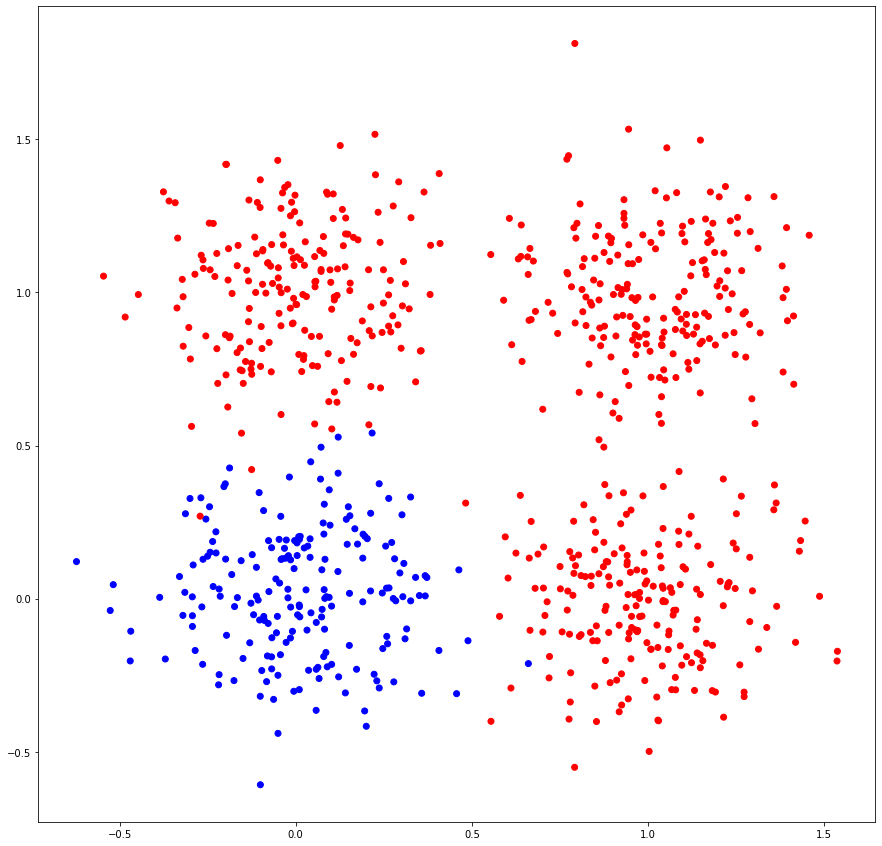

In [8]:
# Criando a lista de cores
cores = criar_cores(saidas)

# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.show()

Desta forma, é possível observar que apenas uma reta não é capaz de separar todos os exemplos do conjunto de dados, sem que exemplos com diferentes rótulos se misturem, sendo abordado melhor a seguir.  

## Separação de Dados

In [9]:
entrada_aleatoria, saida_aleatoria = aleatoriza(entradas, saidas)

**Holdout 70 / 30**

In [10]:
lim = int(len(entrada_aleatoria) * 0.7)
x_treino, y_treino = entrada_aleatoria[:lim], saida_aleatoria[:lim]
x_teste, y_teste = entrada_aleatoria[lim:], saida_aleatoria[lim:]

print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(560, 3) (240, 3) (560,) (240,)


## APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [11]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[ 0.18013334 -0.40245977 -0.40075447]


In [12]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca, s = treinamento(x_treino, y_treino, pesos, taxa_aprendizagem, teta, 100)

Peso: [ 0.18013334 -0.40245977 -0.40075447]
Pesos:  [ 0.08013334 -0.41517712 -0.40223187]
Pesos:  [-0.01986666 -0.40889123 -0.42464857]
Pesos:  [-0.11986666 -0.38986223 -0.42568127]
Pesos:  [-0.01986666 -0.46902718 -0.37062853]
Pesos:  [-0.11986666 -0.46775465 -0.35028198]
Pesos:  [-0.21986666 -0.45965748 -0.31942754]
Pesos:  [-0.31986666 -0.39363071 -0.34061862]
Pesos:  [-0.21986666 -0.47120902 -0.30129759]
Pesos:  [-0.11986666 -0.4670337  -0.36143512]
Pesos:  [-0.21986666 -0.45924836 -0.3367158 ]
Pesos:  [-0.11986666 -0.44499993 -0.41416482]
Pesos:  [-0.21986666 -0.42962827 -0.38708674]
Pesos:  [-0.11986666 -0.50755214 -0.35334883]
Pesos:  [-0.21986666 -0.48177596 -0.3498937 ]
Pesos:  [-0.11986666 -0.46687471 -0.42020193]
Pesos:  [-0.21986666 -0.43285907 -0.41324063]
Pesos:  [-0.31986666 -0.42080624 -0.36047918]
Pesos:  [-0.21986666 -0.37238569 -0.45244383]
Pesos:  [-0.11986666 -0.46419375 -0.41550624]
Pesos:  [-0.21986666 -0.44508305 -0.39444758]
Pesos:  [-0.11986666 -0.41550284 -0.

Pesos:  [-0.31986666 -0.4369567  -0.35067992]
Pesos:  [-0.21986666 -0.41833473 -0.43641227]
96 ajustes no vetor de pesos na época 12
Pesos:  [-0.11986666 -0.49749968 -0.38135952]
Pesos:  [-0.21986666 -0.48940252 -0.35050508]
Pesos:  [-0.31986666 -0.42337574 -0.37169615]
Pesos:  [-0.21986666 -0.50095406 -0.33237512]
Pesos:  [-0.11986666 -0.49677874 -0.39251266]
Pesos:  [-0.21986666 -0.4889934  -0.36779334]
Pesos:  [-0.11986666 -0.47474497 -0.44524236]
Pesos:  [-0.21986666 -0.45937331 -0.41816428]
Pesos:  [-0.11986666 -0.53729718 -0.38442636]
Pesos:  [-0.21986666 -0.511521   -0.38097124]
Pesos:  [-0.11986666 -0.49661975 -0.45127946]
Pesos:  [-0.21986666 -0.46260411 -0.44431816]
Pesos:  [-0.31986666 -0.45055128 -0.39155672]
Pesos:  [-0.21986666 -0.40213072 -0.48352137]
Pesos:  [-0.11986666 -0.49393879 -0.44658378]
Pesos:  [-0.21986666 -0.47482809 -0.42552512]
Pesos:  [-0.31986666 -0.4628077  -0.38453531]
Pesos:  [-0.21986666 -0.48356466 -0.44132459]
Pesos:  [-0.11986666 -0.45398444 -0.497

Pesos:  [-0.31986666 -0.44773182 -0.43050559]
Pesos:  [-0.21986666 -0.43251066 -0.5049478 ]
Pesos:  [-0.31986666 -0.39990367 -0.47175149]
Pesos:  [-0.21986666 -0.48480066 -0.4432035 ]
Pesos:  [-0.11986666 -0.54588726 -0.41403136]
Pesos:  [-0.21986666 -0.50866429 -0.4071009 ]
Pesos:  [-0.11986666 -0.5640827  -0.36706758]
Pesos:  [-0.01986666 -0.53694282 -0.39401513]
Pesos:  [-0.11986666 -0.53287265 -0.37446737]
Pesos:  [-0.21986666 -0.48398065 -0.38819417]
Pesos:  [-0.31986666 -0.47680003 -0.33872579]
Pesos:  [-0.21986666 -0.45817805 -0.42445814]
102 ajustes no vetor de pesos na época 26
Pesos:  [-0.11986666 -0.537343   -0.36940539]
Pesos:  [-0.01986666 -0.52194552 -0.42346814]
Pesos:  [-0.11986666 -0.52067298 -0.4031216 ]
Pesos:  [-0.21986666 -0.51257582 -0.37226716]
Pesos:  [-0.31986666 -0.44654904 -0.39345823]
Pesos:  [-0.21986666 -0.52412736 -0.35413721]
Pesos:  [-0.11986666 -0.51995204 -0.41427474]
Pesos:  [-0.21986666 -0.5121667  -0.38955542]
Pesos:  [-0.11986666 -0.49287434 -0.45

Pesos:  [-0.11986666 -0.48853589 -0.44150854]
Pesos:  [-0.21986666 -0.46275971 -0.43805341]
Pesos:  [-0.31986666 -0.45070688 -0.38529197]
Pesos:  [-0.21986666 -0.40228632 -0.47725662]
Pesos:  [-0.11986666 -0.49409439 -0.44031903]
Pesos:  [-0.21986666 -0.47498369 -0.41926037]
Pesos:  [-0.31986666 -0.4629633  -0.37827057]
Pesos:  [-0.21986666 -0.48372026 -0.43505985]
Pesos:  [-0.11986666 -0.45414004 -0.49132566]
Pesos:  [-0.21986666 -0.43921302 -0.46131627]
Pesos:  [-0.11986666 -0.5111188  -0.43544476]
Pesos:  [-0.21986666 -0.48095993 -0.40805547]
Pesos:  [-0.31986666 -0.44835294 -0.37485916]
Pesos:  [-0.21986666 -0.43521462 -0.45876963]
Pesos:  [-0.11986666 -0.49630121 -0.42959749]
Pesos:  [-0.21986666 -0.45907825 -0.42266703]
Pesos:  [-0.11986666 -0.51449666 -0.38263372]
Pesos:  [-0.01986666 -0.48735678 -0.40958126]
Pesos:  [-0.11986666 -0.48328661 -0.3900335 ]
Pesos:  [-0.21986666 -0.4343946  -0.4037603 ]
Pesos:  [-0.31986666 -0.42721398 -0.35429192]
Pesos:  [-0.21986666 -0.40859201 -

Pesos:  [-0.11986666 -0.59280257 -0.33502531]
Pesos:  [-0.01986666 -0.57740509 -0.38908806]
Pesos:  [-0.11986666 -0.57613255 -0.36874152]
Pesos:  [-0.21986666 -0.56803539 -0.33788707]
Pesos:  [-0.31986666 -0.50200862 -0.35907815]
Pesos:  [-0.21986666 -0.57958693 -0.31975712]
Pesos:  [-0.11986666 -0.57541161 -0.37989466]
Pesos:  [-0.21986666 -0.56762627 -0.35517534]
Pesos:  [-0.11986666 -0.55337784 -0.43262435]
Pesos:  [-0.21986666 -0.53800618 -0.40554628]
Pesos:  [-0.11986666 -0.51871382 -0.46812831]
Pesos:  [-0.21986666 -0.49293764 -0.46467318]
Pesos:  [-0.31986666 -0.48088481 -0.41191174]
Pesos:  [-0.21986666 -0.43246425 -0.50387639]
Pesos:  [-0.11986666 -0.52427232 -0.4669388 ]
Pesos:  [-0.21986666 -0.50516162 -0.44588014]
Pesos:  [-0.31986666 -0.49314123 -0.40489034]
Pesos:  [-0.21986666 -0.46356102 -0.46115615]
Pesos:  [-0.11986666 -0.5354668  -0.43528465]
Pesos:  [-0.21986666 -0.50530792 -0.40789535]
Pesos:  [-0.31986666 -0.47270093 -0.37469904]
Pesos:  [-0.21986666 -0.45956261 -

Pesos:  [-0.11986666 -0.5074322  -0.39231574]
Pesos:  [-0.21986666 -0.49250518 -0.36230634]
Pesos:  [-0.11986666 -0.46215409 -0.45085292]
Pesos:  [-0.21986666 -0.45512531 -0.41179661]
Pesos:  [-0.31986666 -0.42496644 -0.38440732]
Pesos:  [-0.21986666 -0.40974528 -0.45884952]
Pesos:  [-0.31986666 -0.37713829 -0.42565321]
Pesos:  [-0.21986666 -0.36399997 -0.50956369]
Pesos:  [-0.11986666 -0.44889696 -0.4810157 ]
Pesos:  [-0.21986666 -0.411674   -0.47408524]
Pesos:  [-0.11986666 -0.4670924  -0.43405192]
Pesos:  [-0.01986666 -0.43995252 -0.46099946]
Pesos:  [-0.11986666 -0.43588235 -0.44145171]
Pesos:  [-0.21986666 -0.38699035 -0.4551785 ]
Pesos:  [-0.31986666 -0.38273701 -0.41047908]
Pesos:  [-0.21986666 -0.39297064 -0.46590155]
Pesos:  [-0.31986666 -0.38579001 -0.41643318]
Pesos:  [-0.21986666 -0.49249494 -0.38674311]
96 ajustes no vetor de pesos na época 70
Pesos:  [-0.11986666 -0.57165989 -0.33169036]
Pesos:  [-0.01986666 -0.5562624  -0.38575312]
Pesos:  [-0.11986666 -0.55498987 -0.365

Pesos:  [-0.21986666 -0.44055271 -0.46220992]
Pesos:  [-0.11986666 -0.5016393  -0.43303778]
Pesos:  [-0.21986666 -0.46441634 -0.42610731]
Pesos:  [-0.11986666 -0.51983475 -0.386074  ]
Pesos:  [-0.01986666 -0.49269487 -0.41302154]
Pesos:  [-0.11986666 -0.4886247  -0.39347378]
Pesos:  [-0.21986666 -0.43973269 -0.40720058]
Pesos:  [-0.31986666 -0.43255207 -0.35773221]
Pesos:  [-0.21986666 -0.4139301  -0.44346455]
90 ajustes no vetor de pesos na época 84
Pesos:  [-0.11986666 -0.49309505 -0.38841181]
Pesos:  [-0.21986666 -0.48499789 -0.35755736]
Pesos:  [-0.31986666 -0.41897111 -0.37874844]
Pesos:  [-0.21986666 -0.49654943 -0.33942741]
Pesos:  [-0.11986666 -0.49237411 -0.39956495]
Pesos:  [-0.21986666 -0.48458877 -0.37484563]
Pesos:  [-0.11986666 -0.46529641 -0.43742766]
Pesos:  [-0.21986666 -0.43952023 -0.43397253]
Pesos:  [-0.31986666 -0.42746739 -0.38121109]
Pesos:  [-0.21986666 -0.37904684 -0.47317574]
Pesos:  [-0.11986666 -0.47085491 -0.43623815]
Pesos:  [-0.21986666 -0.45174421 -0.415

Pesos:  [-0.11986666 -0.45883668 -0.43569434]
Pesos:  [-0.21986666 -0.4330605  -0.43223921]
Pesos:  [-0.31986666 -0.42100767 -0.37947777]
Pesos:  [-0.21986666 -0.37258711 -0.47144242]
Pesos:  [-0.11986666 -0.46439518 -0.43450483]
Pesos:  [-0.21986666 -0.44528448 -0.41344617]
Pesos:  [-0.31986666 -0.43326409 -0.37245636]
Pesos:  [-0.21986666 -0.53607108 -0.3328154 ]
Pesos:  [-0.11986666 -0.50649087 -0.38908122]
Pesos:  [-0.21986666 -0.49156385 -0.35907183]
Pesos:  [-0.11986666 -0.46121275 -0.4476184 ]
Pesos:  [-0.21986666 -0.45418398 -0.40856209]
Pesos:  [-0.31986666 -0.4240251  -0.3811728 ]
Pesos:  [-0.21986666 -0.40880395 -0.455615  ]
Pesos:  [-0.31986666 -0.37619695 -0.4224187 ]
Pesos:  [-0.21986666 -0.36305863 -0.50632917]
Pesos:  [-0.11986666 -0.44795562 -0.47778118]
Pesos:  [-0.21986666 -0.41073266 -0.47085072]
Pesos:  [-0.11986666 -0.46615107 -0.4308174 ]
Pesos:  [-0.01986666 -0.43901118 -0.45776495]
Pesos:  [-0.11986666 -0.43494102 -0.43821719]
Pesos:  [-0.21986666 -0.38604901 -

In [13]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  100
Pesos finais:  [-0.21986666 -0.48557331 -0.37278554]
Total de ajustes de pesos: 9390


## Item 1

### Criação da Matriz de Confusão para Teste

In [14]:
# Cálculo das saídas previstas
saidas_treino, saidas_teste = [], []

for i in range(len(x_treino)):
    saidas_treino.append(calculo_saida(np.asarray(x_treino[i]), pesos, teta))
    
for i in range(len(x_teste)):
    saidas_teste.append(calculo_saida(np.asarray(x_teste[i]), pesos, teta))

In [15]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_teste)):
    if (y_teste[i] == 0):
        if (saidas_teste[i] == 0):
            vn += 1
        else:
            fn += 1
    else:
        if (saidas_teste[i] == 1):
            vp += 1
        else:
            fp += 1
            
print([[vp, fp], [fn, vn]])

[[50, 3], [10, 177]]


## Itens 2 e 3

### Métricas para Treino

In [16]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_treino)):
    if (y_treino[i] == 0):
        if (saidas_treino[i] == 0):
            vn += 1
        else:
            fn += 1
    else:
        if (saidas_treino[i] == 1):
            vp += 1
        else:
            fp += 1
            
print([[vp, fp], [fn, vn]])

[[142, 5], [18, 395]]


In [17]:
print("Acurácia:", acuracia(vp, vn, fp, fn))
print("Precisão:", precisao(vp, vn, fp, fn))
print("Revocação:", revocacao(vp, vn, fp, fn))
print("F1:", f1(vp, vn, fp, fn))

Acurácia: 0.9589285714285715
Precisão: 0.9659863945578231
Revocação: 0.8875
F1: 0.9250814332247557


## Item 4

### Métricas para Teste

In [18]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_teste)):
    if (y_teste[i] == 0):
        if (saidas_teste[i] == 0):
            vn += 1
        else:
            fn += 1
    else:
        if (saidas_teste[i] == 1):
            vp += 1
        else:
            fp += 1

In [19]:
print("Acurácia:", acuracia(vp, vn, fp, fn))
print("Precisão:", precisao(vp, vn, fp, fn))
print("Revocação:", revocacao(vp, vn, fp, fn))
print("F1:", f1(vp, vn, fp, fn))

Acurácia: 0.9458333333333333
Precisão: 0.9433962264150944
Revocação: 0.8333333333333334
F1: 0.8849557522123894


## GRÁFICO DA SOLUÇÃO

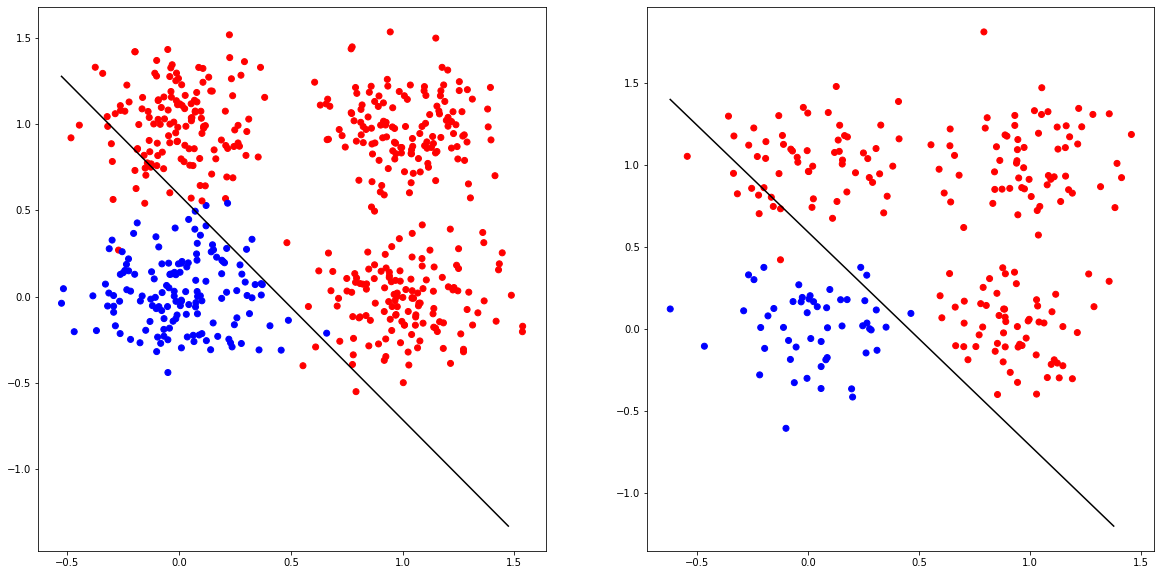

In [20]:
# Criando a lista de cores
cores = criar_cores(y_treino)

# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = min(x_treino[:,1])
maior = max(x_treino[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)


# Criação do gráfico
plt.rcParams['figure.figsize']=(20, 10)
    
plt.subplot(1, 2, 1)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(x_treino[:,1], x_treino[:,2], marker='o',color=cores)


# Criando a lista de cores
cores = criar_cores(y_teste)

# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = min(x_teste[:,1])
maior = max(x_teste[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)
    

plt.subplot(1, 2, 2)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(x_teste[:,1], x_teste[:,2], marker='o',color=cores)
plt.show()